In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 

#Import classes
from datatransform import DataTransform
from dataframeinfo import DataFrameInfo
from plotter import Plotter
from dataframetransform import DataFrameTransform


In [2]:
#Creating class instances
data_trans = DataTransform()
data_info = DataFrameInfo()
plot = Plotter()
df_trans = DataFrameTransform()

In [3]:
df = pd.read_csv('loan_payments.csv', index_col='id')       #load data from local csv file
pd.set_option('display.max_columns', None)      #to display all columns
df

,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,5 years,MORTGAGE,46000.0,Not Verified,Jan-2021,Current,n,credit_card,19.54,2,Oct-1987,1,5.0,NaN,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.000000,0.00,0.00,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL
38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,9 years,RENT,50000.0,Not Verified,Jan-2021,Current,n,credit_card,24.20,0,Sep-2001,0,NaN,NaN,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.000000,0.00,0.00,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,8 years,MORTGAGE,73913.0,Source Verified,Jan-2021,Fully Paid,n,credit_card,16.92,0,Sep-1998,0,69.0,NaN,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.000000,0.00,0.00,Oct-2021,12850.16,NaN,Oct-2021,0.0,NaN,1,INDIVIDUAL
38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,1 year,RENT,42000.0,Source Verified,Jan-2021,Fully Paid,n,debt_consolidation,35.52,0,Jun-2008,0,74.0,NaN,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.000000,0.00,0.00,Jun-2021,13899.67,NaN,Jun-2021,0.0,NaN,1,INDIVIDUAL
38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,10+ years,MORTGAGE,145000.0,Verified,Jan-2021,Current,n,debt_consolidation,3.33,0,Apr-2002,1,37.0,NaN,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.000000,0.00,0.00,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76597,76583,5000,5000.0,1775.0,36 months,9.01,159.03,B,B2,1 year,MORTGAGE,250000.0,Not Verified,Jul-2013,Fully Paid,n,other,10.00,2,Apr-2003,0,5.0,NaN,5,7,0.00,0.00,5724.82,2032.29,5000.00,724.82,0.000000,0.00,0.00,Jul-2016,160.61,NaN,Jul-2016,NaN,NaN,1,INDIVIDUAL
142608,74724,5000,5000.0,2350.0,36 months,10.59,162.73,C,C2,< 1 year,RENT,15000.0,Not Verified,Oct-2013,Fully Paid,n,other,24.40,0,Jan-1999,3,0.0,0.0,6,6,0.00,0.00,5931.25,2787.47,5000.00,826.31,104.942381,0.00,0.00,Oct-2016,490.01,NaN,Sep-2016,0.0,NaN,1,INDIVIDUAL
117045,70978,3500,3500.0,2225.0,36 months,7.43,108.77,A,A2,10+ years,MORTGAGE,300000.0,Not Verified,Aug-2013,Does not meet the credit policy. Status:Fully ...,n,debt_consolidation,1.00,0,Feb-1984,0,NaN,NaN,8,18,0.00,0.00,3915.37,2489.01,3500.00,415.37,0.000000,0.00,0.00,Sep-2016,110.58,Sep-2016,May-2013,NaN,NaN,1,INDIVIDUAL


In [4]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54231 entries, 38676116 to 72323
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   member_id                    54231 non-null  Int64  
 1   loan_amount                  54231 non-null  Int64  
 2   funded_amount                51224 non-null  Int64  
 3   funded_amount_inv            54231 non-null  Float64
 4   term                         49459 non-null  string 
 5   int_rate                     49062 non-null  Float64
 6   instalment                   54231 non-null  Float64
 7   grade                        54231 non-null  string 
 8   sub_grade                    54231 non-null  string 
 9   employment_length            52113 non-null  string 
 10  home_ownership               54231 non-null  string 
 11  annual_inc                   54231 non-null  Float64
 12  verification_status          54231 non-null  string 
 13  issue_date    

In [5]:
#Remove "Source" from column to simplify column

df['verification_status'] = df['verification_status'].str.replace('Source', '').str.strip()

#Changes string columns to period(m)
date_columns = ['issue_date', 'earliest_credit_line', 'last_payment_date', 'next_payment_date','last_credit_pull_date']
for column in date_columns:
    data_trans.string_to_date(df, column)

df

/Users/ssalih/EDA/datatransform.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_column] = pd.to_datetime(df[date_column], errors='coerce').dt.to_period('M')
/Users/ssalih/EDA/datatransform.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_column] = pd.to_datetime(df[date_column], errors='coerce').dt.to_period('M')
/Users/ssalih/EDA/datatransform.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_column] = pd.to_datetime(df[date_column], errors='coerce').dt.to_period('M')
/Users/ssalih/EDA/datatransform.py:8: UserWarning: Could not infer format

,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
38676116,41461848,8000,8000,8000.0,36 months,7.49,248.82,A,A4,5 years,MORTGAGE,46000.0,Not Verified,2021-01,Current,n,credit_card,19.54,2,1987-10,1,5,<NA>,12,27,5529.7,5529.7,2982.51,2982.51,2470.3,512.21,0.0,0.0,0.0,2022-01,248.82,2022-02,2022-01,0,5,1,INDIVIDUAL
38656203,41440010,13200,13200,13200.0,36 months,6.99,407.52,A,A3,9 years,RENT,50000.0,Not Verified,2021-01,Current,n,credit_card,24.2,0,2001-09,0,<NA>,<NA>,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,2022-01,407.52,2022-02,2022-01,0,<NA>,1,INDIVIDUAL
38656154,41439961,16000,16000,16000.0,36 months,7.49,497.63,A,A4,8 years,MORTGAGE,73913.0,Verified,2021-01,Fully Paid,n,credit_card,16.92,0,1998-09,0,69,<NA>,7,18,0.0,0.0,16824.54,16824.54,16000.0,824.54,0.0,0.0,0.0,2021-10,12850.16,NaT,2021-10,0,<NA>,1,INDIVIDUAL
38656128,41439934,15000,15000,15000.0,36 months,14.31,514.93,C,C4,1 year,RENT,42000.0,Verified,2021-01,Fully Paid,n,debt_consolidation,35.52,0,2008-06,0,74,<NA>,6,13,0.0,0.0,15947.47,15947.47,15000.0,947.47,0.0,0.0,0.0,2021-06,13899.67,NaT,2021-06,0,<NA>,1,INDIVIDUAL
38656121,41439927,15000,15000,15000.0,36 months,6.03,456.54,A,A1,10+ years,MORTGAGE,145000.0,Verified,2021-01,Current,n,debt_consolidation,3.33,0,2002-04,1,37,<NA>,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.0,0.0,0.0,2022-01,456.54,2022-02,2022-01,0,<NA>,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76597,76583,5000,5000,1775.0,36 months,9.01,159.03,B,B2,1 year,MORTGAGE,250000.0,Not Verified,2013-07,Fully Paid,n,other,10.0,2,2003-04,0,5,<NA>,5,7,0.0,0.0,5724.82,2032.29,5000.0,724.82,0.0,0.0,0.0,2016-07,160.61,NaT,2016-07,<NA>,<NA>,1,INDIVIDUAL
142608,74724,5000,5000,2350.0,36 months,10.59,162.73,C,C2,< 1 year,RENT,15000.0,Not Verified,2013-10,Fully Paid,n,other,24.4,0,1999-01,3,0,0,6,6,0.0,0.0,5931.25,2787.47,5000.0,826.31,104.942381,0.0,0.0,2016-10,490.01,NaT,2016-09,0,<NA>,1,INDIVIDUAL
117045,70978,3500,3500,2225.0,36 months,7.43,108.77,A,A2,10+ years,MORTGAGE,300000.0,Not Verified,2013-08,Does not meet the credit policy. Status:Fully ...,n,debt_consolidation,1.0,0,1984-02,0,<NA>,<NA>,8,18,0.0,0.0,3915.37,2489.01,3500.0,415.37,0.0,0.0,0.0,2016-09,110.58,2016-09,2013-05,<NA>,<NA>,1,INDIVIDUAL


In [6]:
#Averages testing

# mean_value = data_info.mean(df, 'loan_amount')
# mean_value

mean_value = data_info.mean(df)
mean_value

median_value = data_info.median(df)
median_value

std_value = data_info.std(df)
std_value

member_id                      10312806.882093
loan_amount                        8082.196709
funded_amount                      8019.017599
funded_amount_inv                  8099.473527
int_rate                              4.392893
instalment                          238.920012
annual_inc                        51589.339577
dti                                   7.623124
delinq_2yrs                           0.706706
inq_last_6mths                        1.261421
mths_since_last_delinq                21.92324
mths_since_last_record               36.137264
open_accounts                         4.797169
total_accounts                       11.587025
out_prncp                          5154.893646
out_prncp_inv                      5153.043643
total_payment                      8391.043845
total_payment_inv                  8363.508506
total_rec_prncp                    6958.124264
total_rec_int                      2581.657345
total_rec_late_fee                    6.215792
recoveries   

In [7]:
#Counting distinct values

distinct_values = data_info.distinct_count(df, 'grade')
distinct_values



# category_columns = df.select_dtypes(include=['category']).columns.tolist()

# print("Columns with 'category' dtype:", category_columns)


7

In [8]:
# Print out the shape of the DataFrame
df_shape = data_info.shape_print(df)
df_shape

(54231, 42)

In [9]:
# Generate a count/percentage count of NULL values in each column

total_null = data_info.null_count(df)
total_null

percentage_null = data_info.null_percentage(df)
percentage_null


member_id                      0.000000
loan_amount                    0.000000
funded_amount                  0.055448
funded_amount_inv              0.000000
term                           0.087994
int_rate                       0.095314
instalment                     0.000000
grade                          0.000000
sub_grade                      0.000000
employment_length              0.039055
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_date                     0.000000
loan_status                    0.000000
payment_plan                   0.000000
purpose                        0.000000
dti                            0.000000
delinq_2yrs                    0.000000
earliest_credit_line           0.000000
inq_last_6mths                 0.000000
mths_since_last_delinq         0.571666
mths_since_last_record         0.886025
open_accounts                  0.000000
total_accounts                 0.000000


#### Based on the above we can see the following have a signficantly large null count/ percentage:

mths_since_last_delinq             (0.571666)  
mths_since_last_record             (0.886025)  
next_payment_date                  (0.601280)  
mths_since_last_major_derog        (0.861721)  

As such those will be dropped

In [10]:
columns_to_drop = ['mths_since_last_delinq', 'mths_since_last_record', 'next_payment_date', 'mths_since_last_major_derog']

for column in columns_to_drop:
    df_trans.drop_column(df,column)



df.shape
df


,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
38676116,41461848,8000,8000,8000.0,36 months,7.49,248.82,A,A4,5 years,MORTGAGE,46000.0,Not Verified,2021-01,Current,n,credit_card,19.54,2,1987-10,1,12,27,5529.7,5529.7,2982.51,2982.51,2470.3,512.21,0.0,0.0,0.0,2022-01,248.82,2022-01,0,1,INDIVIDUAL
38656203,41440010,13200,13200,13200.0,36 months,6.99,407.52,A,A3,9 years,RENT,50000.0,Not Verified,2021-01,Current,n,credit_card,24.2,0,2001-09,0,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,2022-01,407.52,2022-01,0,1,INDIVIDUAL
38656154,41439961,16000,16000,16000.0,36 months,7.49,497.63,A,A4,8 years,MORTGAGE,73913.0,Verified,2021-01,Fully Paid,n,credit_card,16.92,0,1998-09,0,7,18,0.0,0.0,16824.54,16824.54,16000.0,824.54,0.0,0.0,0.0,2021-10,12850.16,2021-10,0,1,INDIVIDUAL
38656128,41439934,15000,15000,15000.0,36 months,14.31,514.93,C,C4,1 year,RENT,42000.0,Verified,2021-01,Fully Paid,n,debt_consolidation,35.52,0,2008-06,0,6,13,0.0,0.0,15947.47,15947.47,15000.0,947.47,0.0,0.0,0.0,2021-06,13899.67,2021-06,0,1,INDIVIDUAL
38656121,41439927,15000,15000,15000.0,36 months,6.03,456.54,A,A1,10+ years,MORTGAGE,145000.0,Verified,2021-01,Current,n,debt_consolidation,3.33,0,2002-04,1,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.0,0.0,0.0,2022-01,456.54,2022-01,0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76597,76583,5000,5000,1775.0,36 months,9.01,159.03,B,B2,1 year,MORTGAGE,250000.0,Not Verified,2013-07,Fully Paid,n,other,10.0,2,2003-04,0,5,7,0.0,0.0,5724.82,2032.29,5000.0,724.82,0.0,0.0,0.0,2016-07,160.61,2016-07,<NA>,1,INDIVIDUAL
142608,74724,5000,5000,2350.0,36 months,10.59,162.73,C,C2,< 1 year,RENT,15000.0,Not Verified,2013-10,Fully Paid,n,other,24.4,0,1999-01,3,6,6,0.0,0.0,5931.25,2787.47,5000.0,826.31,104.942381,0.0,0.0,2016-10,490.01,2016-09,0,1,INDIVIDUAL
117045,70978,3500,3500,2225.0,36 months,7.43,108.77,A,A2,10+ years,MORTGAGE,300000.0,Not Verified,2013-08,Does not meet the credit policy. Status:Fully ...,n,debt_consolidation,1.0,0,1984-02,0,8,18,0.0,0.0,3915.37,2489.01,3500.0,415.37,0.0,0.0,0.0,2016-09,110.58,2013-05,<NA>,1,INDIVIDUAL


In [11]:
# If the percentage of missing data is relatively small, you may choose to impute the missing 
# values using statistical methods such as mean or median imputation. 

percentage_null = data_info.null_percentage(df)
percentage_null



member_id                     0.000000
loan_amount                   0.000000
funded_amount                 0.055448
funded_amount_inv             0.000000
term                          0.087994
int_rate                      0.095314
instalment                    0.000000
grade                         0.000000
sub_grade                     0.000000
employment_length             0.039055
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_date                    0.000000
loan_status                   0.000000
payment_plan                  0.000000
purpose                       0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_credit_line          0.000000
inq_last_6mths                0.000000
open_accounts                 0.000000
total_accounts                0.000000
out_prncp                     0.000000
out_prncp_inv                 0.000000
total_payment            

In [12]:
cat_impute = df_trans.impute_categorical_nulls(df)
cat_impute

percentage_null = data_info.null_percentage(df)
percentage_null

# df.dtypes

member_id                     0.000000
loan_amount                   0.000000
funded_amount                 0.055448
funded_amount_inv             0.000000
term                          0.087994
int_rate                      0.095314
instalment                    0.000000
grade                         0.000000
sub_grade                     0.000000
employment_length             0.039055
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_date                    0.000000
loan_status                   0.000000
payment_plan                  0.000000
purpose                       0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_credit_line          0.000000
inq_last_6mths                0.000000
open_accounts                 0.000000
total_accounts                0.000000
out_prncp                     0.000000
out_prncp_inv                 0.000000
total_payment            


funded_amount                 0.055448
term                          0.087994
int_rate                      0.095314
employment_length             0.039055
last_payment_date             0.001346
last_credit_pull_date         0.000129
collections_12_mths_ex_med    0.000940

dtype: float64

If data null data column count is < 1% (ie 0.01) this suggests that this make up a small subset of the data these rows can be removed.

In [13]:
# small_null_percentage_check = ['funded_amount', 'term', 'int_rate', 'employment_length', 'last_payment_date','last_credit_pull_date', 'collections_12_mths_ex_med ']

# drops_null_rows_under_threshold = df_trans.drop_rows_with_sparse_nulls(df)

# percentage_null

sorted_null_percentage = percentage_null.sort_values(ascending=False)
print(sorted_null_percentage)

sparse_null_columns = df_trans.columns_with_sparse_nulls(df)
print(sparse_null_columns)





int_rate                      0.095314
term                          0.087994
funded_amount                 0.055448
employment_length             0.039055
last_payment_date             0.001346
collections_12_mths_ex_med    0.000940
last_credit_pull_date         0.000129
total_rec_int                 0.000000
out_prncp                     0.000000
out_prncp_inv                 0.000000
total_payment                 0.000000
total_payment_inv             0.000000
total_rec_prncp               0.000000
member_id                     0.000000
total_rec_late_fee            0.000000
recoveries                    0.000000
collection_recovery_fee       0.000000
open_accounts                 0.000000
last_payment_amount           0.000000
policy_code                   0.000000
total_accounts                0.000000
earliest_credit_line          0.000000
inq_last_6mths                0.000000
loan_amount                   0.000000
delinq_2yrs                   0.000000
dti                      

In [14]:
# df.dropna(subset=sparse_null_columns)

# percentage_null

# Check for null values before dropping rows
print("Null values before dropping rows:")
print(df[sparse_null_columns].isnull().sum())

# Drop rows containing null values in specified columns
df = df.dropna(subset=sparse_null_columns)

# Check for null values after dropping rows
print("\nNull values after dropping rows:")
print(df[sparse_null_columns].isnull().sum())

percentage_null = data_info.null_percentage(df)
percentage_null


Null values before dropping rows:
last_payment_date             73
last_credit_pull_date          7
collections_12_mths_ex_med    51
dtype: int64

Null values after dropping rows:
last_payment_date             0
last_credit_pull_date         0
collections_12_mths_ex_med    0
dtype: int64


member_id                     0.000000
loan_amount                   0.000000
funded_amount                 0.055416
funded_amount_inv             0.000000
term                          0.088022
int_rate                      0.095360
instalment                    0.000000
grade                         0.000000
sub_grade                     0.000000
employment_length             0.039076
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_date                    0.000000
loan_status                   0.000000
payment_plan                  0.000000
purpose                       0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_credit_line          0.000000
inq_last_6mths                0.000000
open_accounts                 0.000000
total_accounts                0.000000
out_prncp                     0.000000
out_prncp_inv                 0.000000
total_payment            

### Now there are 3 columns left 
lets figure out how the data is missing? Missing Completely at Random (MCAR)? Missing at Random (MAR) or Not Missing at Random (NMAR)
Need to use Plotter to visualise data


<Axes: >

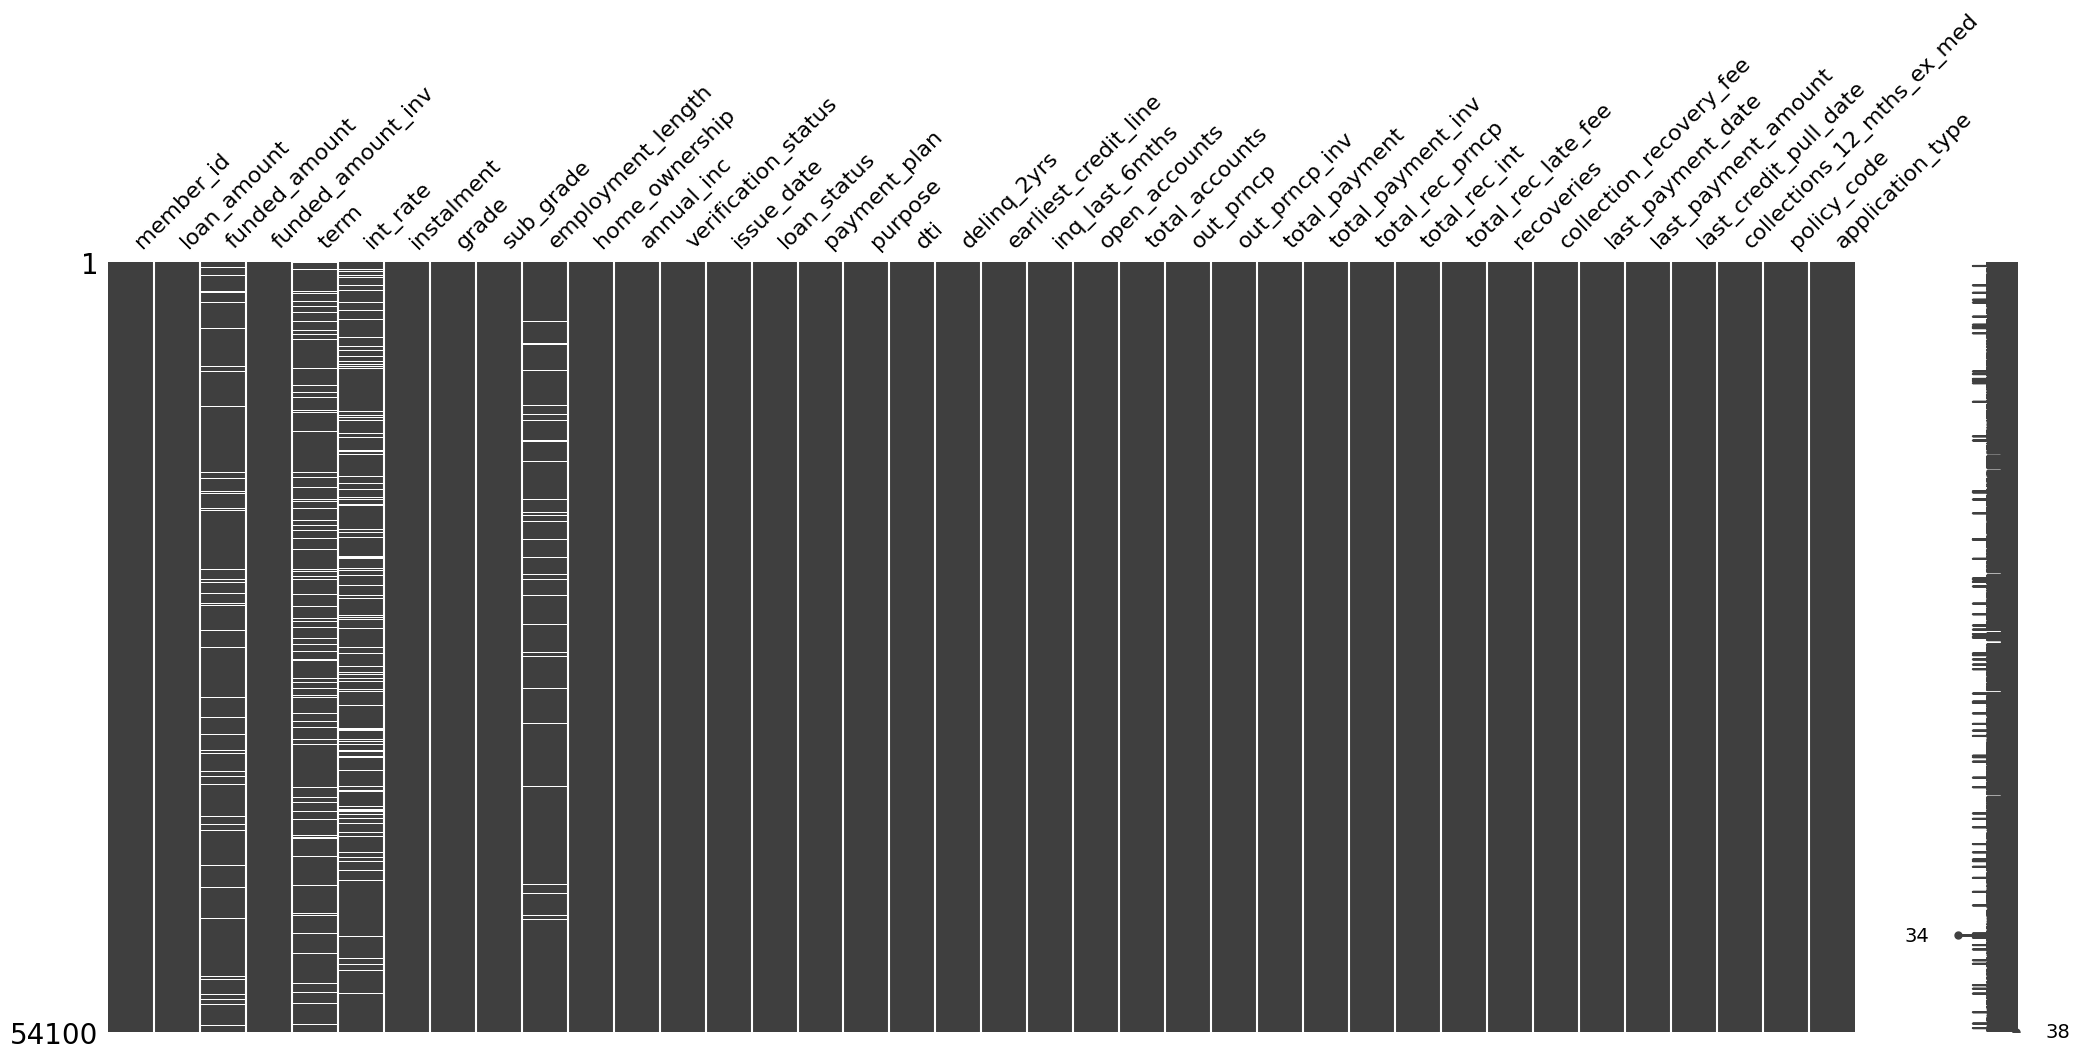

In [15]:
plot.missing_matrix(df)

The missing data seem to be distributed randomly across different observations or rows, suggestive of MAR.
This can imputed using common methids eg mean/ median /mode or random
Nuemrical columns funded_amount and int_rate can be imputed using mean
However when checking int_rate column this was signifcnst changed
Repaceing null values with random values from the column seems to work better

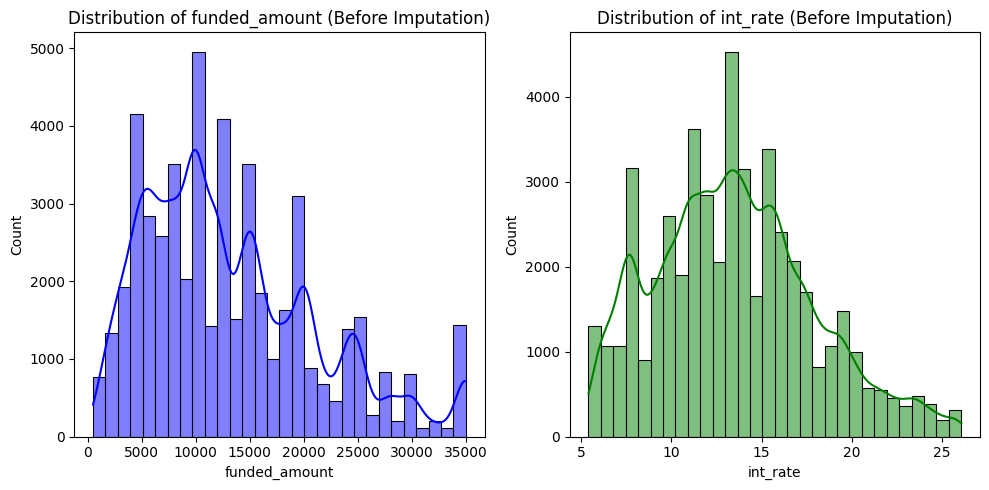

/var/folders/q0/9m7jz7w92mb7qrtp9hwwc5_40000gn/T/ipykernel_22663/2098072684.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['funded_amount'].fillna(int(mean_funded_amount), inplace=True)
/var/folders/q0/9m7jz7w92mb7qrtp9hwwc5_40000gn/T/ipykernel_22663/2098072684.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['funded_amount'].f

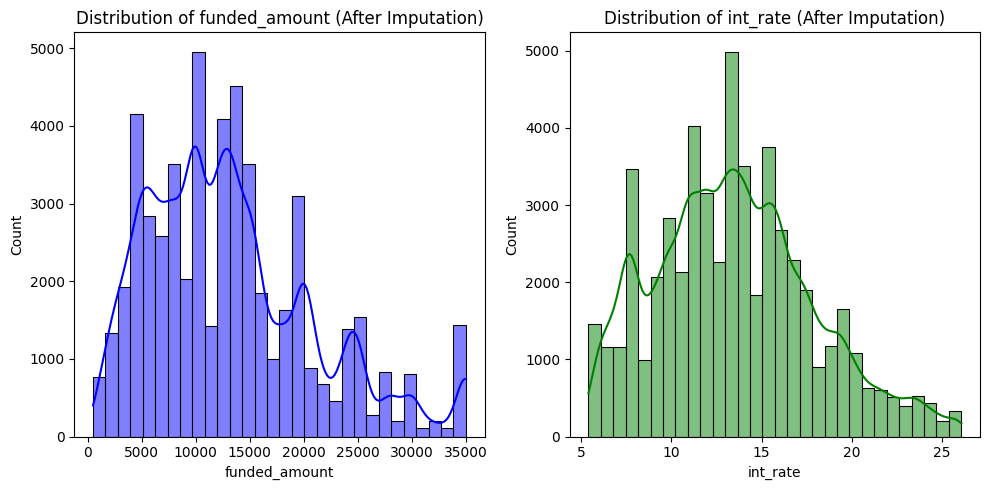

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Check Distribution Before Imputation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['funded_amount'], kde=True, color='blue', bins=30)
plt.title('Distribution of funded_amount (Before Imputation)')

plt.subplot(1, 2, 2)
sns.histplot(df['int_rate'], kde=True, color='green', bins=30)
plt.title('Distribution of int_rate (Before Imputation)')
plt.tight_layout()
plt.show()

# Step 2: Random Imputation
mean_funded_amount = df['funded_amount'].mean()
df['funded_amount'].fillna(int(mean_funded_amount), inplace=True)

# Get non-null values from 'int_rate' column
non_null_values = df['int_rate'].dropna()

# Number of missing values to impute
num_missing = df['int_rate'].isnull().sum()

# Generate random imputed values by sampling from the non-null values
random_imputed_values = np.random.choice(non_null_values, size=num_missing)

# Fill missing values with randomly imputed values
df.loc[df['int_rate'].isnull(), 'int_rate'] = random_imputed_values


# Step 3: Check Distribution After Imputation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['funded_amount'], kde=True, color='blue', bins=30)
plt.title('Distribution of funded_amount (After Imputation)')

plt.subplot(1, 2, 2)
sns.histplot(df['int_rate'], kde=True, color='green', bins=30)
plt.title('Distribution of int_rate (After Imputation)')
plt.tight_layout()
plt.show()


<Axes: >

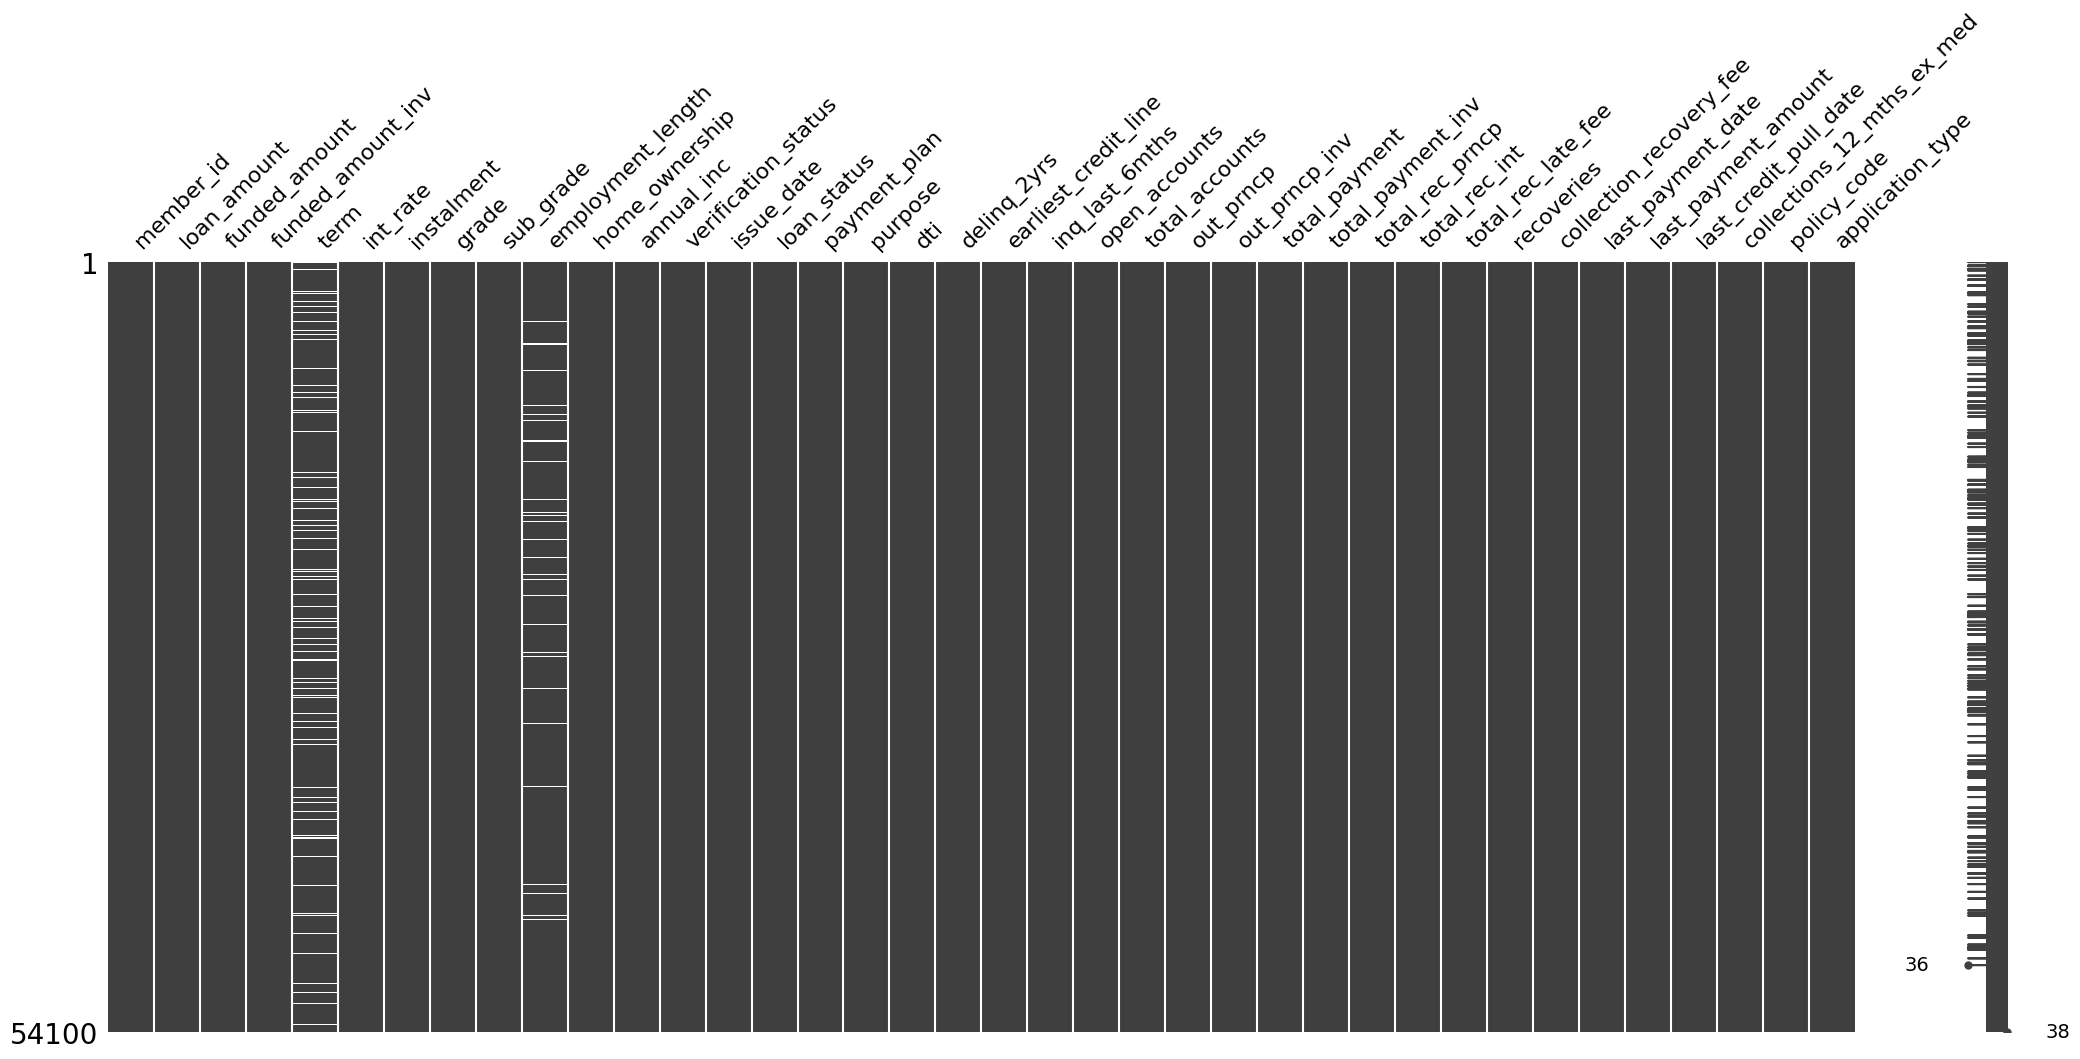

In [17]:
plot.missing_matrix(df)

Missing values in a time series data can be interpolated of neighbouring values
period('M') columns



In [18]:
period_col = ['employment_length', 'term']

for col in period_col:
    unique_values = df[col].unique()
    print(unique_values)

#Output shows clear categorical pattern- using mode seems better than using FFill or BFill
    
#Fill using mode
mode_value = data_info.mode(df, period_col)
mode_value

# Fill null values in 'employment_length' and 'term' columns with mode values
for col in period_col:
    mode_value = data_info.mode(df, col).iloc[0]  # Calculate mode for each column
    df[col].fillna(mode_value, inplace=True)  # Fill null values with mode

# Check if null values have been filled
print(df[period_col].isnull().sum())

<StringArray>
[  '5 years',   '9 years',   '8 years',    '1 year', '10+ years',  '< 1 year',
        <NA>,   '7 years',   '3 years',   '4 years',   '6 years',   '2 years']
Length: 12, dtype: string
<StringArray>
['36 months', <NA>, '60 months']
Length: 3, dtype: string
employment_length    0
term                 0
dtype: int64


/var/folders/q0/9m7jz7w92mb7qrtp9hwwc5_40000gn/T/ipykernel_22663/1764526794.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)  # Fill null values with mode
/var/folders/q0/9m7jz7w92mb7qrtp9hwwc5_40000gn/T/ipykernel_22663/1764526794.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(m

<Axes: >

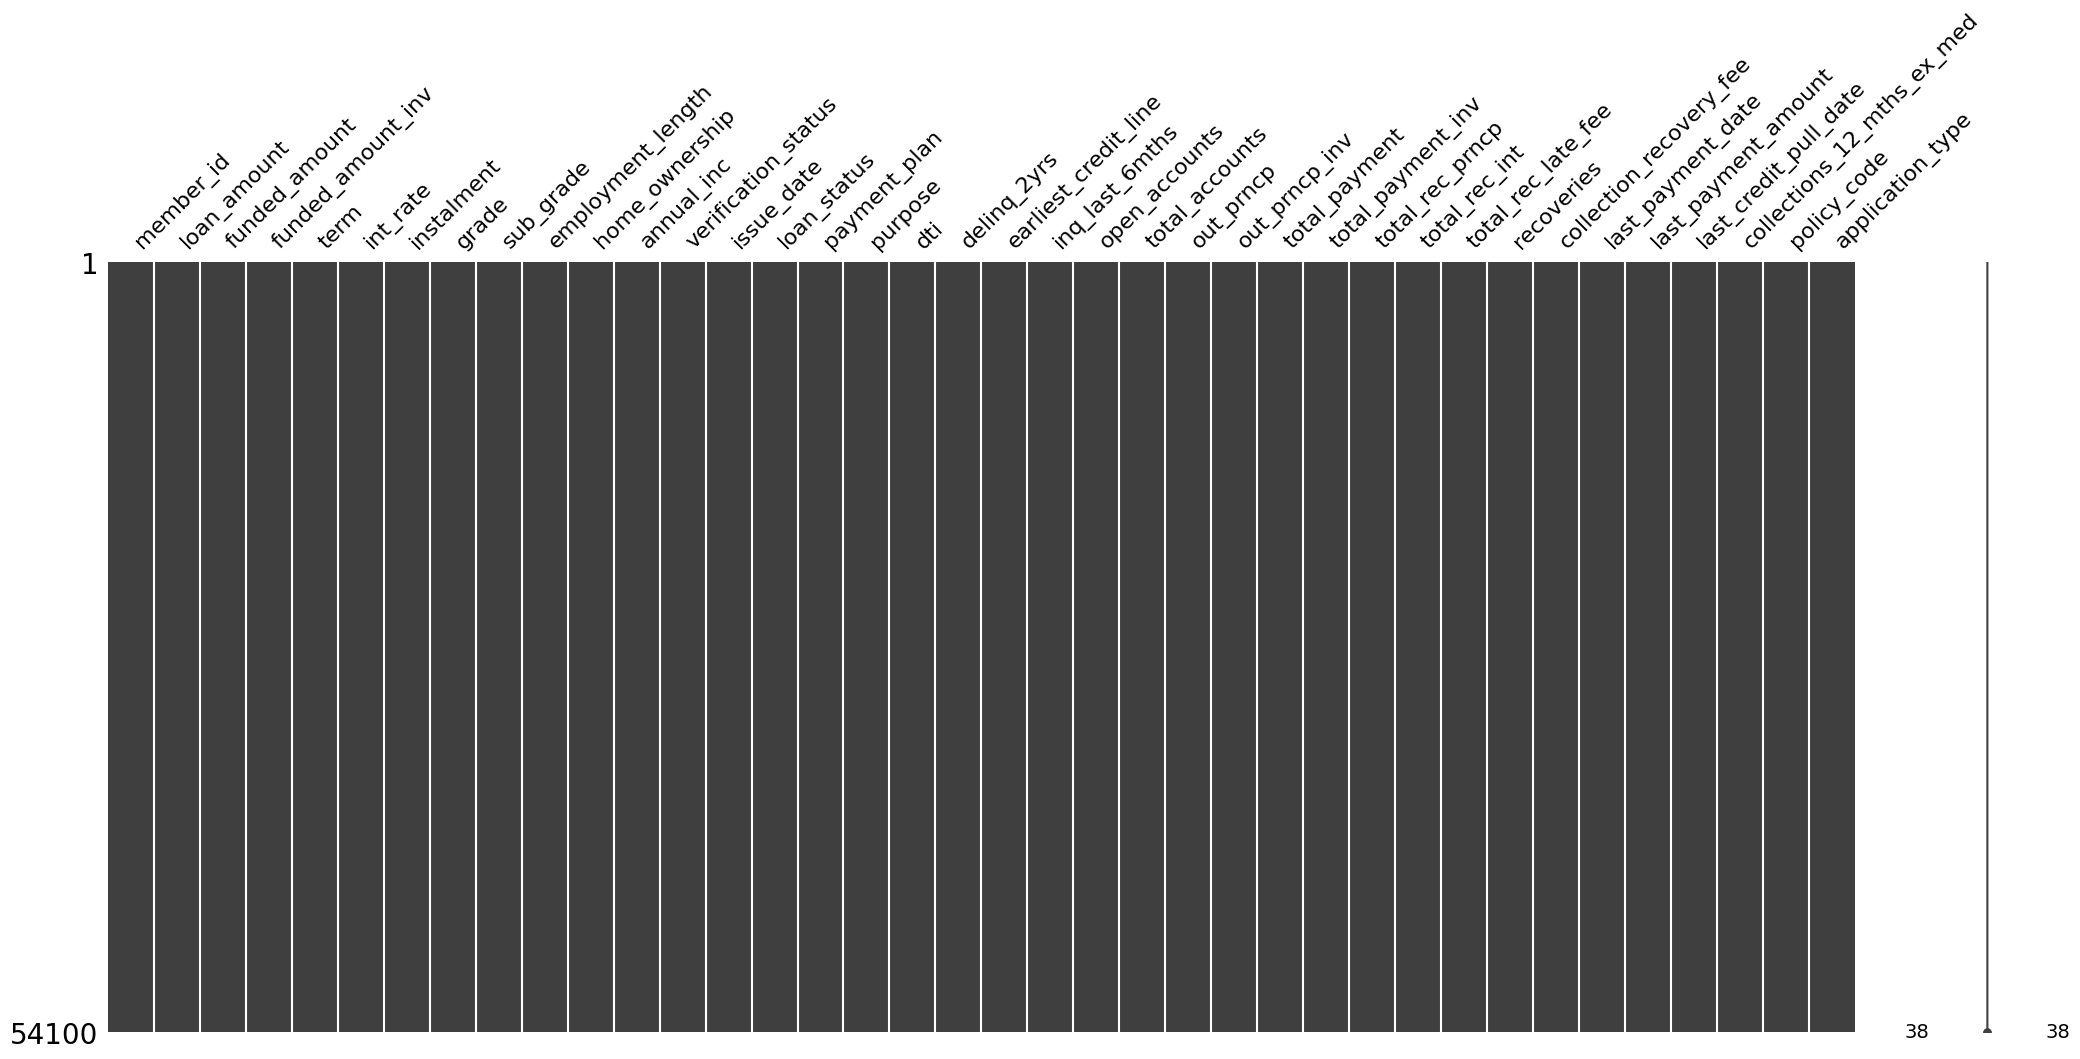

In [19]:
plot.missing_matrix(df)

Now that null values have been imputed

In [20]:
percentage_null = data_info.null_percentage(df)
percentage_null

member_id                     0.0
loan_amount                   0.0
funded_amount                 0.0
funded_amount_inv             0.0
term                          0.0
int_rate                      0.0
instalment                    0.0
grade                         0.0
sub_grade                     0.0
employment_length             0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_date                    0.0
loan_status                   0.0
payment_plan                  0.0
purpose                       0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_credit_line          0.0
inq_last_6mths                0.0
open_accounts                 0.0
total_accounts                0.0
out_prncp                     0.0
out_prncp_inv                 0.0
total_payment                 0.0
total_payment_inv             0.0
total_rec_prncp               0.0
total_rec_int                 0.0
total_rec_late

### Performing transformations on skewed columns
histograms are a good way to identify skewed data

In [21]:
#First identify skewed columns 


# df_histogram = plot.facet_grid_histogram(df)
# df_histogram

# Filter numeric columns
data_skew = data_info.calculate_skew(df)
data_skew


member_id                      2.204549
loan_amount                    0.804312
funded_amount                  0.844544
funded_amount_inv              0.814251
int_rate                       0.408726
instalment                      0.99615
annual_inc                     8.735737
dti                             0.18902
delinq_2yrs                    5.318818
inq_last_6mths                 3.243836
open_accounts                  1.059493
total_accounts                 0.780083
out_prncp                      2.352526
out_prncp_inv                  2.352946
total_payment                  1.269266
total_payment_inv              1.258474
total_rec_prncp                1.262007
total_rec_int                  2.203625
total_rec_late_fee            13.258472
recoveries                    14.382675
collection_recovery_fee       27.794716
last_payment_amount            2.496079
collections_12_mths_ex_med    20.298064
policy_code                         0.0
dtype: Float64